In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data)
m, n = data.shape
# there are 42001 images which contains 784 pixel

np.random.shuffle(data)
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [4]:
X_train[:,0].shape

(784,)

In [5]:
Y_train

array([5, 1, 7, ..., 5, 4, 7], dtype=int64)

In [6]:
#Initializing Parameter
def init_params():
    w1 = np.random.rand(10,784)-0.5
    b1 = np.random.rand(10,1)-0.5
    w2 = np.random.rand(10,10)-0.5
    b2 = np.random.rand(10,1)-0.5
    return w1,b1,w2,b2

In [7]:
#step1: Forward Propogation
def RelU(z):
    return np.maximum(0,z)

def softmax(z):
    return np.exp(z)/sum(np.exp(z))

def forward_prop(w1,b1,w2,b2,X):
    Z1 = w1.dot(X) + b1
    A1 = RelU(Z1)
    Z2 = w2.dot(A1) +b2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2

In [8]:
#step2: back Propogation
def One_hot(Y):
    one_hot_y = np.zeros((Y.size,Y.max()+1))
    one_hot_y[np.arange(Y.size),Y]=1
    one_hot_y = one_hot_y.T
    return one_hot_y

def deriv_RelU(Z):
    return Z>0

def back_prop(Z1,A1,Z2,A2,w1,w2,X,Y):
    m = Y.size
    one_hot_y = One_hot(Y)
    dZ2 = A2-one_hot_y
    dw2 =1/m*dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = w2.T.dot(dZ2)*deriv_RelU(Z1)
    dw1 =1/m*dZ1.dot(X.T)
    db1 =1/m * np.sum(dZ1, axis=1, keepdims=True)
    return dw1,db1,dw2,db2
    

In [9]:
def update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha):
    w1 = w1 - alpha*dw1
    b1 = b1 - alpha*db1
    w2 = w2 - alpha*dw2
    b2 = b2 - alpha*db2
    return w1,b1,w2,b2

In [10]:
#apply Gradient Descent Algo
def get_predictions(A2):
    return np.argmax(A2,0) #axis = 0 means A2 will be in y axis form
def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions == Y)/Y.size

def gradient_descent(X,Y,alpha,iterations):
    accuracy =0
    w1,b1,w2,b2 = init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2 = forward_prop(w1,b1,w2,b2,X)
        dw1,db1,dw2,db2 = back_prop(Z1,A1,Z2,A2,w1,w2,X,Y)
        w1,b1,w2,b2 = update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha)
        
        if i%10 == 0:
            print('Iteration: ', i)
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions,Y)
            print(accuracy)

    return w1,b1,w2,b2,accuracy

In [11]:
w1,b1,w2,b2,accuracy = gradient_descent(X_train,Y_train,0.10,500)

Iteration:  0
[9 9 8 ... 6 6 9] [5 1 7 ... 5 4 7]
0.10824390243902439
Iteration:  10
[1 1 8 ... 3 3 9] [5 1 7 ... 5 4 7]
0.24446341463414634
Iteration:  20
[1 1 8 ... 3 3 9] [5 1 7 ... 5 4 7]
0.3208536585365854
Iteration:  30
[1 1 7 ... 3 3 9] [5 1 7 ... 5 4 7]
0.36209756097560974
Iteration:  40
[1 1 9 ... 3 3 9] [5 1 7 ... 5 4 7]
0.40848780487804875
Iteration:  50
[1 1 9 ... 3 3 9] [5 1 7 ... 5 4 7]
0.4837560975609756
Iteration:  60
[1 1 9 ... 3 2 9] [5 1 7 ... 5 4 7]
0.5419512195121952
Iteration:  70
[1 1 9 ... 3 2 9] [5 1 7 ... 5 4 7]
0.5824634146341463
Iteration:  80
[1 1 9 ... 3 2 9] [5 1 7 ... 5 4 7]
0.6157560975609756
Iteration:  90
[1 1 9 ... 3 2 9] [5 1 7 ... 5 4 7]
0.6415609756097561
Iteration:  100
[1 1 9 ... 3 2 9] [5 1 7 ... 5 4 7]
0.6645609756097561
Iteration:  110
[1 1 9 ... 3 4 7] [5 1 7 ... 5 4 7]
0.6846585365853659
Iteration:  120
[1 1 9 ... 3 4 7] [5 1 7 ... 5 4 7]
0.702
Iteration:  130
[1 1 9 ... 3 4 7] [5 1 7 ... 5 4 7]
0.7164390243902439
Iteration:  140
[1 1 9 ...

In [12]:
def make_predictions(X,w1,b1,w2,b2):
    _,_,_,A2 = forward_prop(w1,b1,w2,b2,X)
    predictions = get_predictions(A2)
    return predictions

In [13]:
def test_prediction(index,w1,b1,w2,b2):
    current_image = X_train[:,index,None]
    prediction = make_predictions(current_image,w1,b1,w2,b2)
    label = Y_train[index]
    print("prediction: ", prediction)
    print("label: ",label)
    current_image = current_image.reshape((28, 28)) * 255.
    plt.gray()
    plt.imshow(current_image,interpolation = 'nearest')
    plt.show()

prediction:  [5]
label:  5


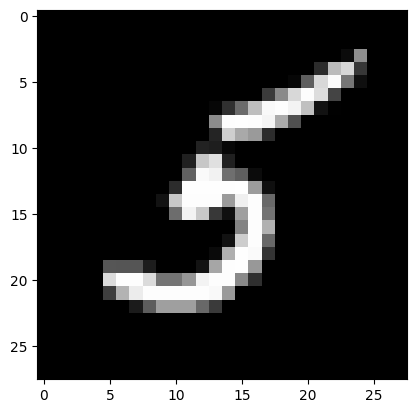

prediction:  [1]
label:  1


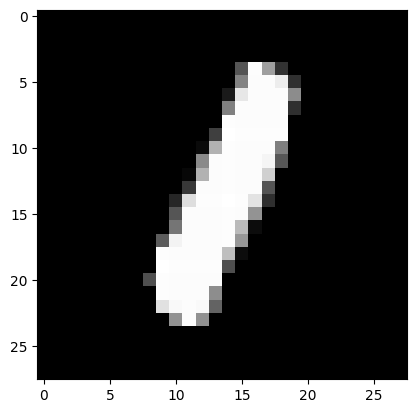

prediction:  [9]
label:  7


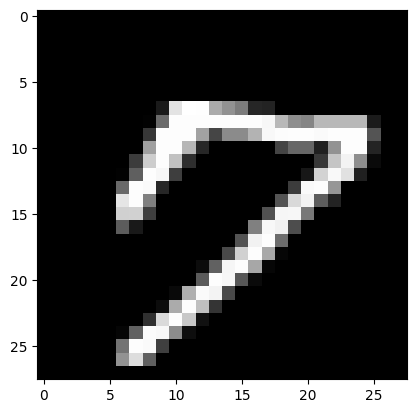

prediction:  [8]
label:  8


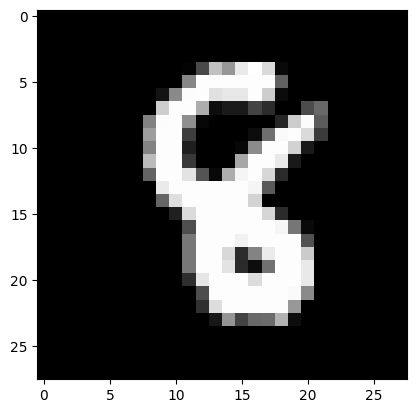

In [14]:
test_prediction(0,w1,b1,w2,b2)
test_prediction(1,w1,b1,w2,b2)
test_prediction(2,w1,b1,w2,b2)
test_prediction(3,w1,b1,w2,b2)

In [15]:
accuracy*100

85.34878048780487